# 1.层次聚类 

In [3]:
pip install sklearn2pmml

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple

  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.83.0-py3-none-any.whl size=6267700 sha256=ea92ddb1d86ff223ba28f04d2c4a15b8483e9046e4dbbe8b6d921943298ed577
  Stored in directory: c:\users\taki\appdata\local\pip\cache\wheels\49\04\dc\41df7791433ad87d310476dd2d4fd0ab875a0f757841a9f1d4
Successfully built sklearn2pmml


In [4]:
import pandas as pd
from sklearn import preprocessing   #导出数据预处理包
import numpy as np    #导入np数据
import  matplotlib.pyplot as plt  #导入画图包
from scipy.cluster.hierarchy import linkage, dendrogram #导入层次画图包
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline

In [3]:
#导入数据集
iris_data=pd.read_csv('data/Score_train.csv',sep = ',')
print(iris_data)          #输出数据集
print(iris_data.shape)  # 返回几行几列
print(iris_data.ndim)   # 返回维度
print(iris_data.dtypes) # 返回各列的类型

(100, 2)
2
Chinese    int64
Math       int64
dtype: object


In [10]:
display(iris_data.describe().round(0))

,Chinese,Math
count,100.0,100.0
mean,78.0,79.0
std,14.0,13.0
min,55.0,55.0
25%,65.0,67.0
50%,78.0,79.0
75%,89.0,90.0
max,100.0,100.0


In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Chinese  100 non-null    int64
 1   Math     100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


<AxesSubplot:xlabel='Chinese', ylabel='Math'>

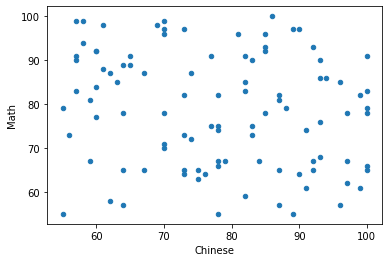

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
iris_data.plot(kind='scatter',x='Chinese',y='Math')

<AxesSubplot:>

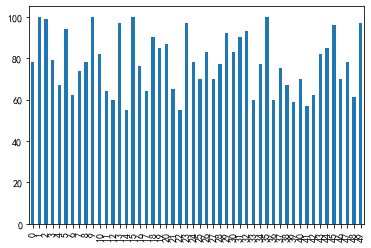

In [15]:
import matplotlib as mpl
%matplotlib inline

# 设置字体支持
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"]=False

iris_data['Chinese'].head(50).plot(kind = 'bar')

<AxesSubplot:>

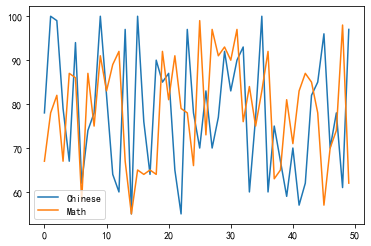

In [21]:
iris_data.head(50).plot()

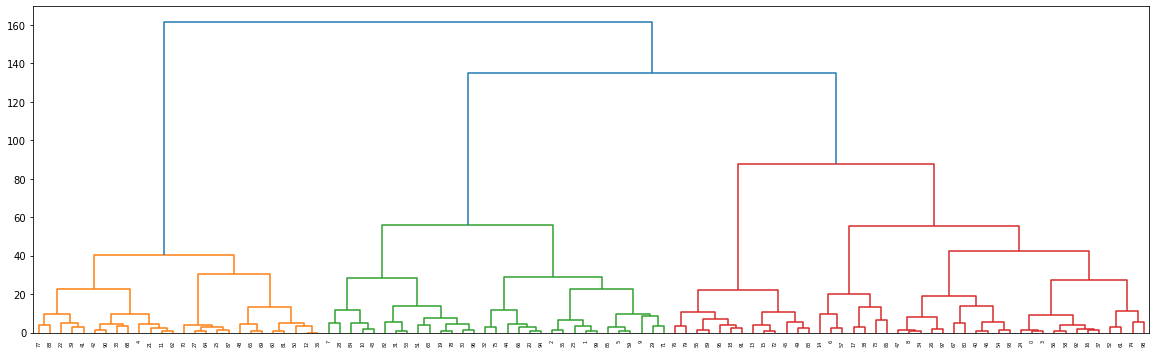

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram  #导入层次聚类包
plt.figure(figsize=(20,6))  #画图层次聚类图
#层次聚类，采用离差平方和欧式距离作为类间和类内度量方式
Z = linkage(iris_data, method='ward', metric='euclidean') #调用SK提供层次聚类方法
p = dendrogram(Z, 0)     #画出层次聚类图
plt.show()  #展示层次聚类树

In [4]:
from sklearn.cluster import AgglomerativeClustering
ac=PMMLPipeline([("AgglomerativeClustering",AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward'))])
#ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
ac.fit(iris_data)

PMMLPipeline(steps=[('AgglomerativeClustering', AgglomerativeClustering(n_clusters=4))])

In [5]:
labels = ac.fit_predict(iris_data)
print(labels)

[2 0 0 2 1 0 2 0 2 0 0 1 1 3 2 3 2 2 3 0 0 1 1 0 2 1 2 1 0 0 0 0 0 1 2 0 1
 2 2 1 2 1 1 0 0 3 2 2 1 3 1 0 2 0 2 3 2 2 2 0 1 2 1 0 1 1 0 2 1 1 1 0 3 2
 2 0 3 1 0 3 2 1 0 3 0 0 2 1 1 3 1 3 2 2 0 3 0 2 2 0]


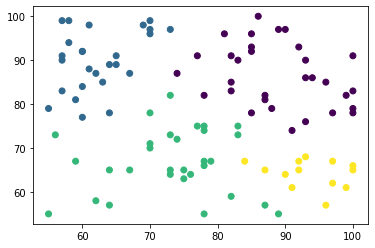

In [6]:
plt.scatter(iris_data['Chinese'], iris_data['Math'], c=labels)
plt.show()

## 测试

In [71]:
iris_data2=pd.read_csv('data/Score.csv',sep = ',')
print(iris_data2)          #输出数据集
del iris_data2['sno']

      sno  Chinese  Math
0   10001       68    78
1   10002       83    75
2   10003       86    66
3   10004       82    64
4   10005       56    91
5   10006       57    79
6   10007       97    89
7   10008       82    82
8   10009       79    79
9   10010       96    86
10  10011       82    65
11  10012       91    78
12  10013       95    55
13  10014       58    88
14  10015       87    98
15  10016       95    76
16  10017       59    73
17  10018       61    58
18  10019       88    65
19  10020       89    91
20  10021       99    92
21  10022       87    95
22  10023       91    91
23  10024       80    58
24  10025       97    59
25  10026       65    60
26  10027       58    63
27  10028       97    60
28  10029       81    75
29  10030       83    65
30  10031       72    99
31  10032       81    63
32  10033       83    69
33  10034      100    59
34  10035       84    71
35  10036       79    84
36  10037       96    99
37  10038       72    57
38  10039       88    74


In [72]:
labels2 = ac.fit_predict(iris_data2)
print(labels2)

[0 3 1 1 0 0 2 3 3 2 1 3 1 0 2 3 0 0 1 2 2 2 2 1 1 0 0 1 3 1 2 1 3 1 3 3 2
 1 3 2 0 1 0 0 0 3 0 0 3 1]


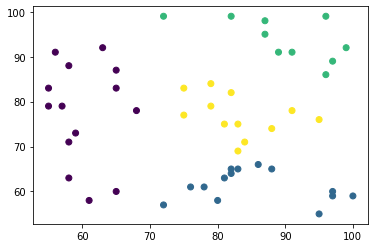

In [75]:
plt.scatter(iris_data2['Chinese'], iris_data2['Math'], c=labels2)
plt.show()

# 2.K-Means 

In [1]:
from sklearn.cluster import KMeans
iris_data=pd.read_csv('data/Score_train.csv',sep = ',')
print(iris_data)          #输出数据集

NameError: name 'pd' is not defined

In [46]:
km =KMeans(n_clusters=4)

In [47]:
#km =PMMLPipeline(([("KMeans",KMeans(n_clusters=4))]))
km.fit(iris_data)

KMeans(n_clusters=4)

In [48]:
labels = km.fit_predict(iris_data)
print(labels)

[1 0 0 1 2 0 1 2 1 0 0 2 2 3 1 3 1 1 3 0 0 2 2 0 1 2 3 2 0 0 0 0 0 2 1 0 2
 1 1 2 1 2 2 0 0 3 1 1 2 3 2 0 3 0 1 3 1 1 1 0 2 3 2 0 2 2 0 2 2 2 2 0 3 1
 1 3 3 2 0 3 1 2 0 3 0 0 1 2 2 3 2 3 1 1 0 3 0 0 3 0]


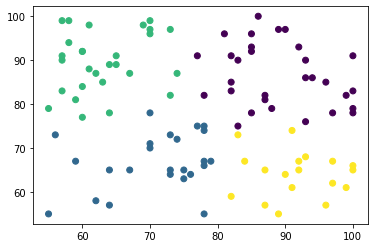

In [49]:
plt.scatter(iris_data['Chinese'], iris_data['Math'], c=labels)
plt.show()

## 测试

In [50]:
iris_data2=pd.read_csv('data/Score.csv',sep = ',')
print(iris_data2)          #输出数据集
del iris_data2['sno']

      sno  Chinese  Math
0   10001       68    78
1   10002       83    75
2   10003       86    66
3   10004       82    64
4   10005       56    91
5   10006       57    79
6   10007       97    89
7   10008       82    82
8   10009       79    79
9   10010       96    86
10  10011       82    65
11  10012       91    78
12  10013       95    55
13  10014       58    88
14  10015       87    98
15  10016       95    76
16  10017       59    73
17  10018       61    58
18  10019       88    65
19  10020       89    91
20  10021       99    92
21  10022       87    95
22  10023       91    91
23  10024       80    58
24  10025       97    59
25  10026       65    60
26  10027       58    63
27  10028       97    60
28  10029       81    75
29  10030       83    65
30  10031       72    99
31  10032       81    63
32  10033       83    69
33  10034      100    59
34  10035       84    71
35  10036       79    84
36  10037       96    99
37  10038       72    57
38  10039       88    74


In [51]:
labels2 = km.fit_predict(iris_data2)
print(labels2)

[1 0 0 0 1 1 2 2 0 2 0 0 0 1 2 0 1 3 0 2 2 2 2 3 0 3 3 0 0 0 2 0 0 0 0 2 2
 3 0 2 1 3 1 1 1 1 1 1 1 3]


In [52]:
data={'Chinese':[25,100,90,20],'Math':[100,57,80,14]}
df=pd.DataFrame(data)


In [53]:
print(df)

   Chinese  Math
0       25   100
1      100    57
2       90    80
3       20    14


In [54]:
labels3 = km.fit_predict(df)
print(labels3)

[2 0 3 1]


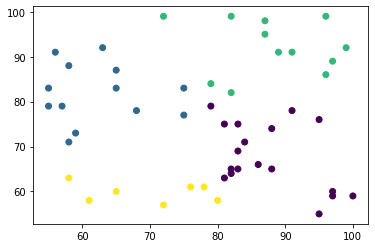

In [55]:
plt.scatter(iris_data2['Chinese'], iris_data2['Math'], c=labels2)
plt.show()

In [56]:
from sklearn.metrics import silhouette_score
print(silhouette_score(iris_data, labels, metric='euclidean'))
print(silhouette_score(iris_data2, labels2, metric='euclidean'))

0.4323449459513866
0.3963194727872971


# 3.保存模型

In [36]:
sklearn2pmml(km, "km.pmml", with_repr=True)

C:\Anaconda3\lib\subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
C:\Anaconda3\lib\subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


In [57]:
import joblib
joblib.dump(km, 'km.model')

['km.model']